In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
dates = pd.date_range(start = "2023-01-01", end = "2024-03-19", freq = "D")
dates 

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13',
               '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17',
               '2024-03-18', '2024-03-19'],
              dtype='datetime64[ns]', length=444, freq='D')

In [80]:
# Simulate daily temperature readings: sine wave + noise
baseline_temp = 10  # Average temperature
amplitude = 15  # Seasonal variation amplitude
noise_strength = 3  # Random daily fluctuation strength

# Generate temperature readings
temperatures = baseline_temp + amplitude * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, noise_strength, len(dates))
temperatures


Float64Index([  9.57628327541389,  9.887530840410696, 11.113389081072008,
              11.907553547077953,  8.313472042954086,  9.821067594370785,
                9.61040419708922, 12.123411978079817, 13.361925155836564,
              16.606438052366023,
              ...
              22.238735835483084, 27.218110755529835,   25.9745052203687,
               25.69781199525163, 19.300050274103075,  27.07257890672059,
              26.919728886432793, 24.257252729152757,  22.68488979733761,
              26.213880218435527],
             dtype='float64', length=444)

In [81]:
d = {'Date':dates, 'Temperature':temperatures}

In [82]:
data = pd.DataFrame(d)
data

,Date,Temperature
0,2023-01-01,9.576283
1,2023-01-02,9.887531
2,2023-01-03,11.113389
3,2023-01-04,11.907554
4,2023-01-05,8.313472
...,...,...
439,2024-03-15,27.072579
440,2024-03-16,26.919729
441,2024-03-17,24.257253
442,2024-03-18,22.684890


In [83]:
data = data.set_index('Date')
data

,Temperature
Date,
2023-01-01,9.576283
2023-01-02,9.887531
2023-01-03,11.113389
2023-01-04,11.907554
2023-01-05,8.313472
...,...
2024-03-15,27.072579
2024-03-16,26.919729
2024-03-17,24.257253


<AxesSubplot:xlabel='Date'>

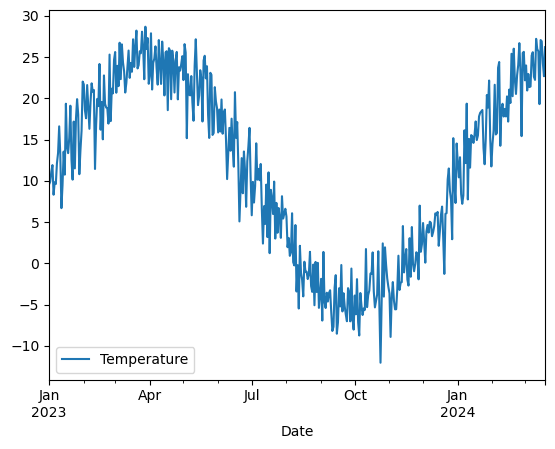

In [84]:
data.plot()

In [85]:
# but you have to do polyfit and polyval to fit the line and show plot,,, data has index Date and Column tempertate

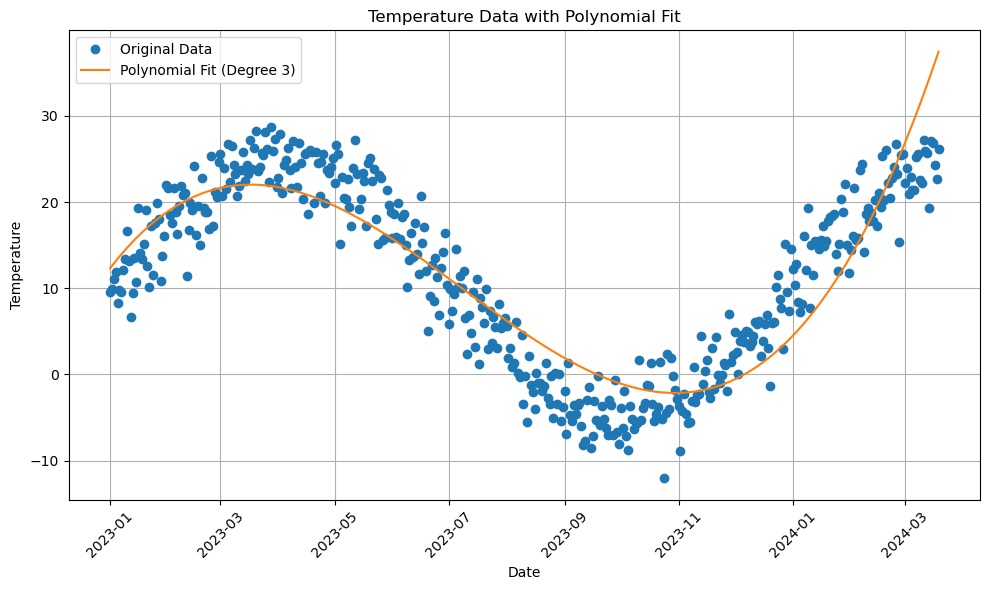

In [86]:
x = data.index.astype(np.int64) // 10**9  # Converting dates to Unix timestamp
y = data['Temperature'].values

# Perform polynomial fitting
degree = 3  # Choose the degree of the polynomial
coefficients = np.polyfit(x, y, degree)

# Generate the polynomial function
poly_function = np.poly1d(coefficients)

# Evaluate the polynomial at specific points
x_fit = np.linspace(x.min(), x.max(), 100)  # Generating 100 points for smoother curve
y_fit = poly_function(x_fit)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, 'o', label='Original Data')  # Plot original data
plt.plot(pd.to_datetime(x_fit * 10**9), y_fit, label=f'Polynomial Fit (Degree {degree})')  # Plot fitted polynomial
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Data with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
data

,Temperature
Date,
2023-01-01,9.576283
2023-01-02,9.887531
2023-01-03,11.113389
2023-01-04,11.907554
2023-01-05,8.313472
...,...
2024-03-15,27.072579
2024-03-16,26.919729
2024-03-17,24.257253


In [88]:
# for finding weekly average temperatuer for all my data
# month dadta and year data nd save it to a variable
weekly_df  = data['Temperature'].resample('W').mean()

In [89]:
monthly_df  = data['Temperature'].resample('M').mean()
monthly_df

Date
2023-01-31    13.436696
2023-02-28    19.488892
2023-03-31    24.573222
2023-04-30    23.877682
2023-05-31    21.165565
2023-06-30    14.013253
2023-07-31     7.238880
2023-08-31    -0.594107
2023-09-30    -4.662721
2023-10-31    -3.479224
2023-11-30    -0.933695
2023-12-31     5.797727
2024-01-31    14.596726
2024-02-29    20.486188
2024-03-31    23.889139
Freq: M, Name: Temperature, dtype: float64

In [90]:
yearly_df  = data['Temperature'].resample('Y').mean()
yearly_df

Date
2023-12-31     9.936510
2024-12-31    18.993565
Freq: A-DEC, Name: Temperature, dtype: float64

<AxesSubplot:xlabel='Date'>

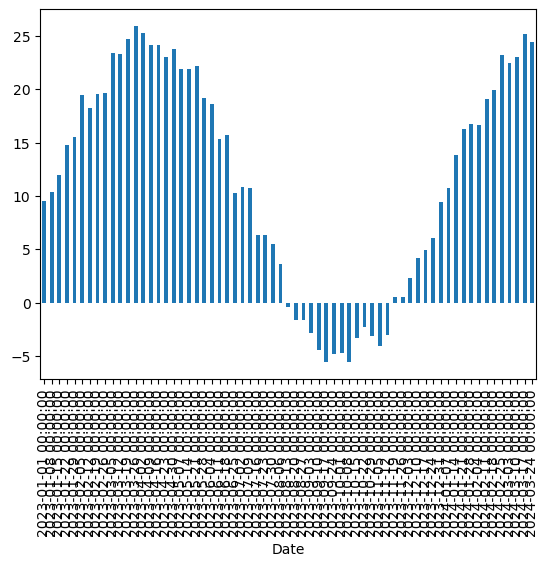

In [91]:
weekly_df.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

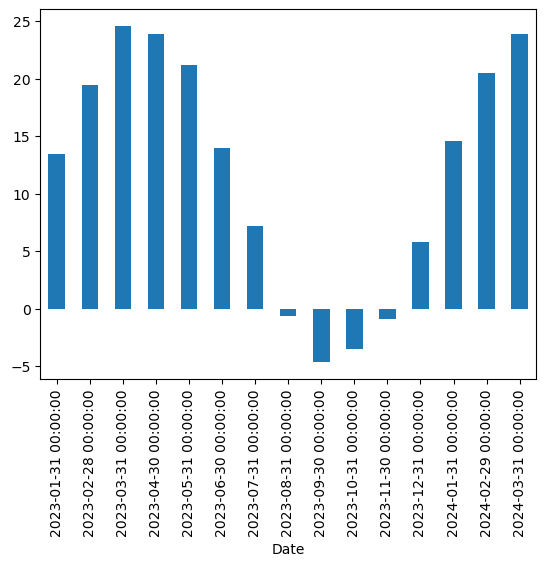

In [92]:
monthly_df.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

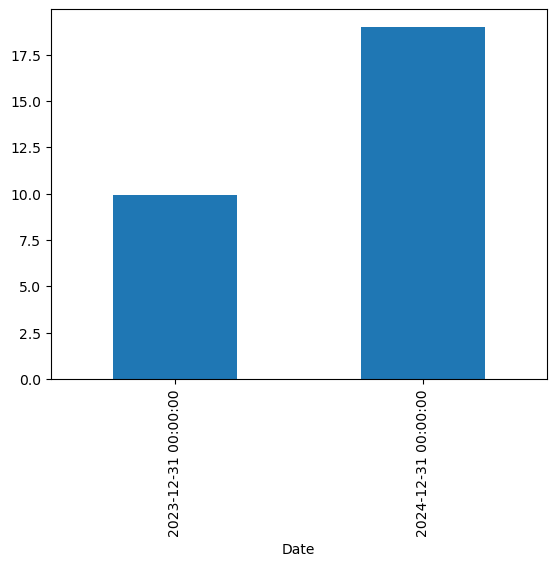

In [93]:
yearly_df.plot(kind='bar')

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator

# Assuming 'data' is your DataFrame containing temperature data
# Assuming 'date' column is in datetime format

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Resample the data to get weekly averages
weekly_avg_temp = data['temperature'].resample('W').mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_temp.index, weekly_avg_temp.values, marker='o', linestyle='-')

# Formatting x-axis
plt.gca().xaxis.set_major_locator(AutoDateLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Weekly Average Temperature')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


KeyError: "None of ['date'] are in the columns"

In [ ]:
data = pd.read_csv("realistic_medical_data.csv")
data

,Species,Gender,Lifespan
0,Dog,Female,9
1,Cat,Male,14
2,Rabbit,Male,5
3,Cat,Female,1
4,Cat,Female,3
...,...,...,...
95,Rabbit,Male,1
96,Cat,Male,2
97,Mouse,Male,1
98,Mouse,Female,4


In [ ]:
data.pivot_table(values = "Lifespan", index = "Species", columns = "Gender",aggfunc='min')

Gender,Female,Male
Species,,
Cat,1,1
Dog,3,1
Human,11,2
Mouse,1,1
Rabbit,1,1


In [ ]:
# removign data less than 0
data = data [data['Lifespan'] >0]

In [ ]:
# schools, subjects, marsk

In [ ]:
# please use seaborn to plot with hue of species
data.head(5)

,Species,Gender,Lifespan
0,Dog,Female,9
1,Cat,Male,14
2,Rabbit,Male,5
3,Cat,Female,1
4,Cat,Female,3


<AxesSubplot:xlabel='Lifespan', ylabel='Gender'>

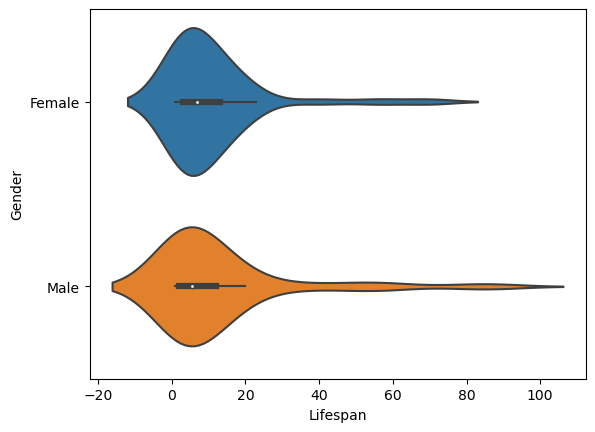

In [ ]:
import seaborn as sb
sb.violinplot(data = data, x = "Lifespan", y = "Gender")

<AxesSubplot:xlabel='Lifespan', ylabel='Species'>

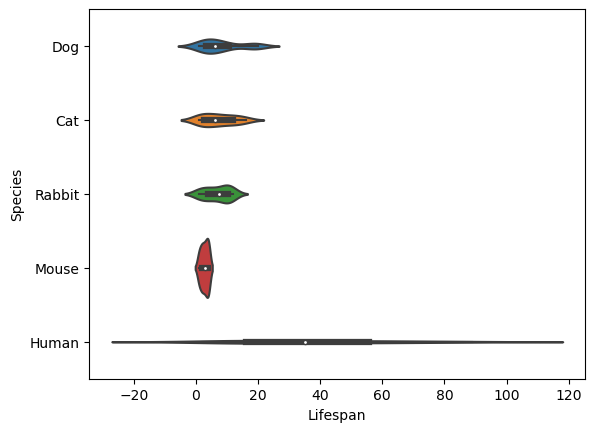

In [ ]:
import seaborn as sb
sb.violinplot(data = data, x = "Lifespan", y = "Species")

In [100]:
import pandas as pd
import numpy as np

# Simulate gene expression data for 5 genes at 4 time points
data = np.random.rand(5, 4)  # Random data to simulate gene expression levels
columns = ['T1', 'T2', 'T3', 'T4']
genes = ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE']

df = pd.DataFrame(data, columns=columns, index=genes)


# Example analysis: Calculate mean expression at each time point
df

,T1,T2,T3,T4
GeneA,0.155717,0.975287,0.258435,0.519101
GeneB,0.476936,0.644971,0.426522,0.679885
GeneC,0.998749,0.616710,0.965090,0.262823
GeneD,0.360200,0.423736,0.792146,0.439177
GeneE,0.059404,0.579621,0.015290,0.573968


In [ ]:
f(g(x))

f(x)=3sin^2x - 2cosx
f'(x)

In [ ]:
# derivative of sinx and derivative of cosx
# derivative of sin ^2x and derivative of cos^2x

Question: If you were to calculate the average gene expression level across all genes at time point T3, what pandas operation would you use to achieve this? Please write the pandas code snippet that would perform this calculation.

In [103]:
df = pd.DataFrame(data, columns=columns, index=genes)
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of              T1        T2        T3        T4
GeneA  0.155717  0.975287  0.258435  0.519101
GeneB  0.476936  0.644971  0.426522  0.679885
GeneC  0.998749  0.616710  0.965090  0.262823
GeneD  0.360200  0.423736  0.792146  0.439177
GeneE  0.059404  0.579621  0.015290  0.573968>

In [104]:
df.mean(axis=1)

GeneA    0.477135
GeneB    0.557079
GeneC    0.710843
GeneD    0.503815
GeneE    0.307071
dtype: float64